# 4. Supervised machine learning

### This script contains:

1. Import libraries & data
2. Extreme values check
3. Data prep for regression analysis
4. Regression analysis
5. Bonus - second regression analysis

## Import Libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# display charts without having to call them

%matplotlib inline

In [3]:
# file path

path = r'C:\Users\Odette\Desktop\CareerFoundry\Immersion Courses\Course 6\02 Data'

In [33]:
# import data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Suicide_clean.csv'), index_col = False)

In [5]:
df.head()

,Region Code,Region,Country Code,Country,Year,Sex,"Suicide Rates per 100,000",Female Population,Male Population,Total Population,Unemployment Percentage,GDP (Current US$)
0,AMR,Americas,BRB,Barbados,2019,Female,0.16,148208,138813,287021,10.10,5.209000e+09
1,AMR,Americas,BRB,Barbados,2019,Both sexes,0.31,148208,138813,287021,10.10,5.209000e+09
2,AMR,Americas,BRB,Barbados,2019,Male,0.49,148208,138813,287021,10.10,5.209000e+09
3,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Female,0.67,54496,56097,110593,18.62,8.250407e+08
4,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,Both sexes,1.01,54496,56097,110593,18.62,8.250407e+08


In [6]:
df.shape

(4644, 12)

## Extreme values check

As the data has already been cleaned, I'm only conducting an extreme values check

<AxesSubplot:xlabel='Suicide Rates per 100,000', ylabel='Density'>

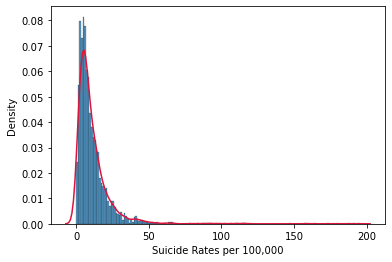

In [7]:
# use a histogram to show extreme values in 'Suicide Rates per 100,000'

ax = sns.histplot(x = (df['Suicide Rates per 100,000']), kde = False, stat = 'density')
sns.kdeplot(x = (df['Suicide Rates per 100,000']), color = 'crimson', ax = ax)

# can't change the colour of kde(line) using sns.histplot. Need to plot kde separately to set the colour

In [8]:
# check the mean, median & max of 'Suicide Rates per 100,000'

df['Suicide Rates per 100,000'].agg(['mean', 'median', 'max'])

mean       11.08619
median      7.71000
max       195.20000
Name: Suicide Rates per 100,000, dtype: float64

## Data prep for regression analysis

Text(0, 0.5, 'Suicide Rates per 100,000')

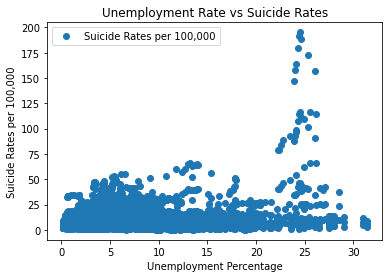

In [9]:
# create a scatterplot to visualise how the variables plot against each other

df.plot(x = 'Unemployment Percentage', y = 'Suicide Rates per 100,000',style = 'o')
plt.title('Unemployment Rate vs Suicide Rates')  
plt.xlabel('Unemployment Percentage')  
plt.ylabel('Suicide Rates per 100,000')

**Hypothesis**

The higher the unemployment rate, the higher the suicide rate

In [10]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df['Unemployment Percentage'].values.reshape(-1,1)
y = df['Suicide Rates per 100,000'].values.reshape(-1,1)

In [11]:
X

array([[10.1 ],
       [10.1 ],
       [10.1 ],
       ...,
       [13.48],
       [13.48],
       [13.48]])

In [12]:
y

array([[0.16],
       [0.31],
       [0.49],
       ...,
       [7.26],
       [7.63],
       [8.22]])

In [13]:
# split data into training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [14]:
# create a regression object to fit onto the training set

regression = LinearRegression()

In [15]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# predict the values of y using X.

y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Suicide Rates per 100,000')

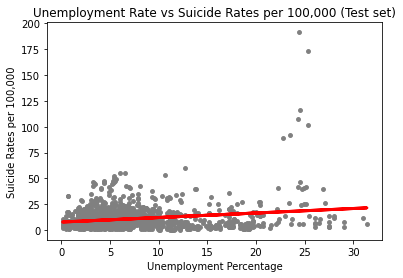

In [17]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color ='red', linewidth = 3)
plot_test.title('Unemployment Rate vs Suicide Rates per 100,000 (Test set)')
plot_test.xlabel('Unemployment Percentage')
plot_test.ylabel('Suicide Rates per 100,000')

The line doesn't fit all the data points, although there is a slight upward trend. There is a cluster of data points in the lower end of the uneployment percentage, with outliers pushing the trend line up around the 25% unemployment rate mark. 

In [18]:
# create & print objects that contain the model summary statistics and evaluate

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43765835]]
Mean squared error:  151.49645053980072
R2 score:  0.022462668093680582


In [19]:
y_predicted

array([[ 8.77240942],
       [10.23856489],
       [10.87316949],
       ...,
       [14.45321479],
       [15.91499368],
       [16.84282938]])

In [20]:
# create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.82,8.772409
1,3.90,10.238565
2,21.04,10.873169
3,1.85,8.916837
4,6.70,8.299738
5,4.16,10.566809
6,16.74,13.901765
7,22.12,11.455255
8,21.47,11.555917
9,2.83,16.361405


The model didn't perform well on the test set. There is so much variance between the actual and predicted figures, which supports the low R2 score of 0.0225. It also rejects the null hypothesis, despite the positive trendline.
There is data bias in that not all countries are represented in the analysis, so there is data missing for them. Also, collecting data is difficult for most developing countries, so the data may not represent the true numbers in those countries.

## Bonus - second regression analysis

### Data prep for regression analysis

Text(0, 0.5, 'Suicide Rates per 100,000')

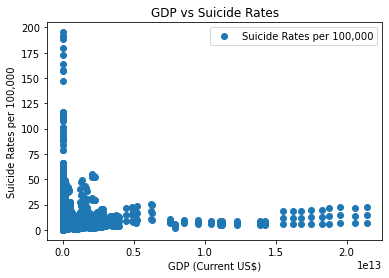

In [21]:
# create a scatterplot to visualise how the variables plot against each other

df.plot(x = 'GDP (Current US$)', y = 'Suicide Rates per 100,000',style = 'o')
plt.title('GDP vs Suicide Rates')  
plt.xlabel('GDP (Current US$)')  
plt.ylabel('Suicide Rates per 100,000')

**Hypothesis**

The lower the GDP, the higher the suicide rate

In [22]:
# reshape the variables into NumPy arrays and put them into separate objects

X1 = df['GDP (Current US$)'].values.reshape(-1,1)
y1 = df['Suicide Rates per 100,000'].values.reshape(-1,1)

In [23]:
X1

array([[5.20900000e+09],
       [5.20900000e+09],
       [5.20900000e+09],
       ...,
       [1.28907645e+10],
       [1.28907645e+10],
       [1.28907645e+10]])

In [24]:
y1

array([[0.16],
       [0.31],
       [0.49],
       ...,
       [7.26],
       [7.63],
       [8.22]])

In [25]:
# split data into training & test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

### Regression analysis

In [26]:
# create a regression object to fit onto the training set

regression = LinearRegression()

In [27]:
# fit the regression object onto the training set

regression.fit(X1_train, y1_train)

LinearRegression()

In [28]:
# predict the values of y using X.

y1_predicted = regression.predict(X1_test)

Text(0, 0.5, 'Suicide Rates per 100,000')

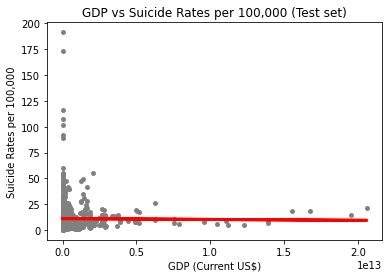

In [29]:
# create a plot that shows the regression line from the model on the test set

plot_test1 = plt
plot_test1.scatter(X1_test, y1_test, color = 'gray', s = 15)
plot_test1.plot(X1_test, y1_predicted, color = 'red', linewidth = 3)
plot_test1.title('GDP vs Suicide Rates per 100,000 (Test set)')
plot_test1.xlabel('GDP (Current US$)')
plot_test1.ylabel('Suicide Rates per 100,000')

The line doesn't fit all the data points. There is a cluster of data points in the lower end of the GDP range, but the trend line is almost flat, demonstrating no linear relationship

In [30]:
# create & print objects that contain the model summary statistics and evaluate

rmse = mean_squared_error(y1_test, y1_predicted)
r2 = r2_score(y1_test, y1_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-8.53678635e-14]]
Mean squared error:  155.00907478855495
R2 score:  -0.00020269022911767465


In [31]:
y1_predicted

array([[11.15721894],
       [11.15585943],
       [11.14700237],
       ...,
       [11.15402228],
       [11.15735739],
       [11.1563451 ]])

In [32]:
# create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.82,11.157219
1,3.90,11.155859
2,21.04,11.147002
3,1.85,11.155613
4,6.70,11.156555
5,4.16,11.153669
6,16.74,11.157019
7,22.12,11.112896
8,21.47,11.157361
9,2.83,11.052248


The model didn't perform well on the test set. There is so much variance between the actual and predicted figures, which supports the low R2 score of -0.000202. This rejects the null hypothesis, or at least there is no linear relationship between these 2 variables